In [1]:
!pip install matplotlib
!pip install numpy
!pip install mne

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from itertools import compress

import matplotlib.pyplot as plt
import numpy as np

import mne

fnirs_data_folder = mne.datasets.fnirs_motor.data_path()
fnirs_cw_amplitude_dir = fnirs_data_folder / "Participant-1"
raw_intensity = mne.io.read_raw_nirx(fnirs_cw_amplitude_dir, verbose=True)
raw_intensity.load_data()

Loading C:\Users\pavan\mne_data\MNE-fNIRS-motor-data\Participant-1
Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


Measurement date,"November 02, 2019 13:16:16 GMT"
Experimenter,Unknown
Participant,P1
Digitized points,31 points
Good channels,56 fNIRS (CW amplitude)
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,7.81 Hz
Highpass,0.00 Hz
Lowpass,3.91 Hz


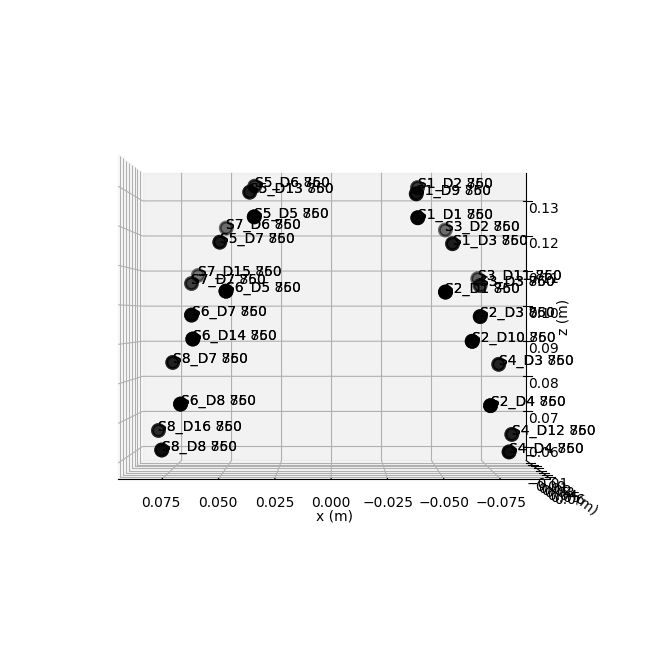

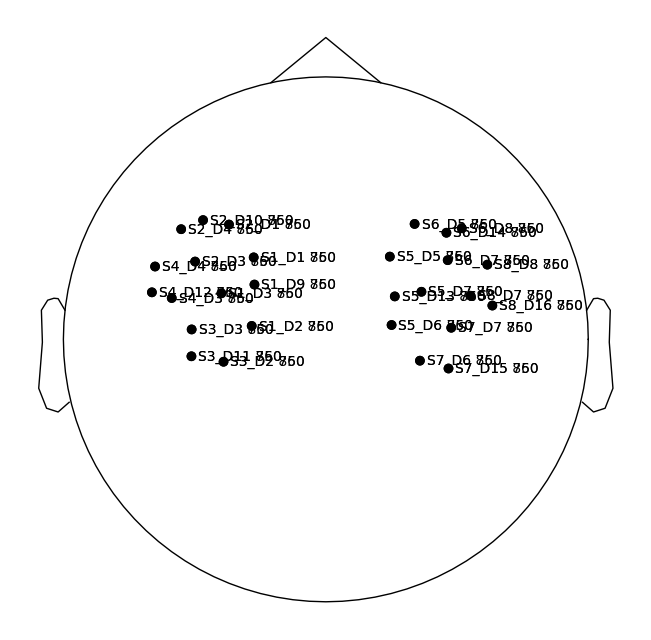

In [3]:
# Plot the optode positions
raw_intensity.plot_sensors(kind='3d', show_names=True)

# Optionally, you can plot the sensor positions in 2D
raw_intensity.plot_sensors(kind='topomap', show_names=True)

# Show the plots
plt.show()

Using matplotlib as 2D backend.


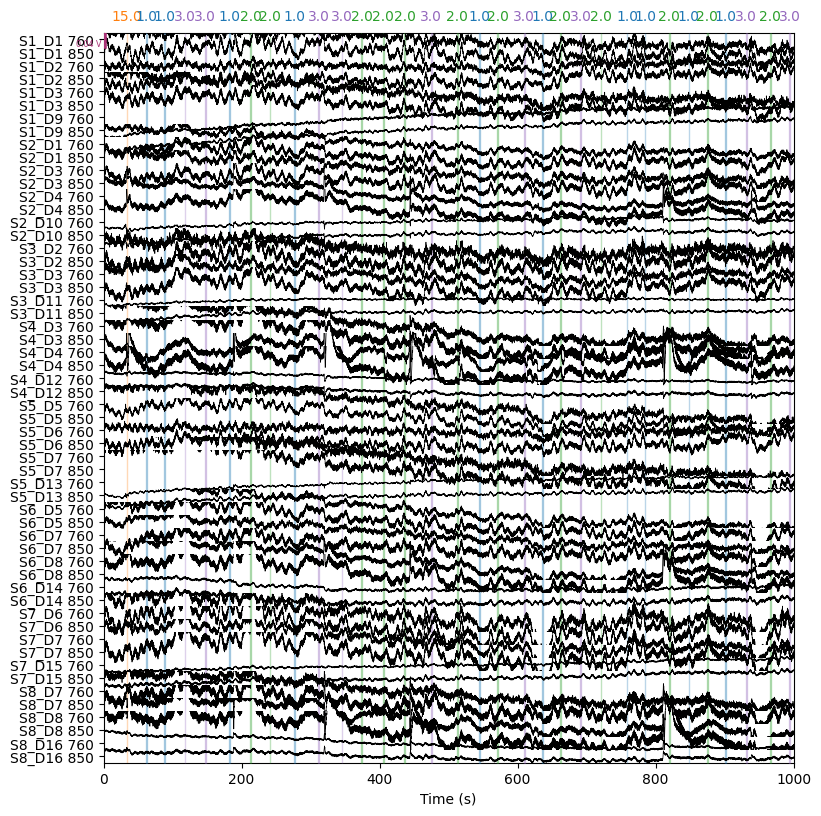

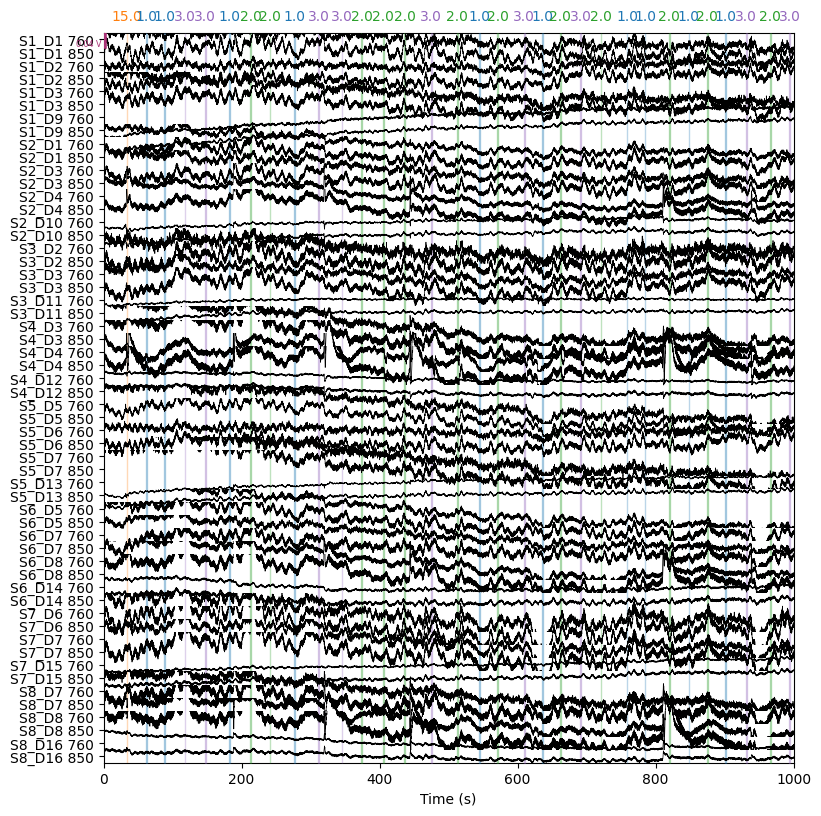

In [4]:
raw_od = mne.preprocessing.nirs.optical_density(raw_intensity)
raw_od.plot(n_channels=len(raw_od.ch_names), duration=1000, show_scrollbars=False)

In [5]:
# Get the montage (optode positions)
montage = raw_intensity.get_montage()

# Extract the coordinates of optodes
optode_positions = montage.get_positions()

# Extract and print the coordinates for channels
ch_pos = optode_positions['ch_pos']
print("Optode Positions (in meters):")
for ch_name, pos in ch_pos.items():
    print(f"{ch_name}: {pos}")

# Optional: Convert positions to a more readable format (e.g., millimeters)
ch_pos_mm = {ch: pos * 1000 for ch, pos in ch_pos.items()}
print("\nOptode Positions (in millimeters):")
for ch_name, pos in ch_pos_mm.items():
    print(f"{ch_name}: {pos}")


Optode Positions (in meters):
S1: [-0.0416132   0.02679978  0.12990439]
S2: [-0.06476686  0.05814257  0.09084258]
S3: [-0.07120555 -0.01287427  0.10787861]
S4: [-0.08590437  0.0189717   0.06509762]
S5: [0.03694172 0.02748381 0.1302213 ]
S6: [0.06065134 0.05882415 0.09117718]
S7: [ 0.06712771 -0.01219923  0.10857255]
S8: [0.08188686 0.02042793 0.06571325]
D1: [-0.03761959  0.06322852  0.11572803]
D2: [-0.04134445 -0.01177961  0.13495003]
D3: [-0.07242425  0.02347293  0.10322219]
D4: [-0.07912593  0.05140929  0.05737005]
D5: [0.03352717 0.06359968 0.11583881]
D6: [ 0.0368664  -0.01139716  0.13536724]
D7: [0.06791593 0.02468254 0.10366605]
D8: [0.07531009 0.05226884 0.05787698]
D9: [-0.03773895  0.03408266  0.12949198]
D10: [-0.06145431  0.064438    0.09061004]
D11: [-0.07282879 -0.00527871  0.10743055]
D12: [-0.08439611  0.02706123  0.06559511]
D13: [0.04001334 0.02043975 0.13063768]
D14: [0.0642802  0.05162126 0.09133633]
D15: [ 0.06521393 -0.01926037  0.10880928]
D16: [0.08272091 0.012

In [6]:
# Get the channel positions from the info object
ch_pos = raw_intensity.info['chs']

# Extract the coordinates and names of channels
channel_coordinates = {ch['ch_name']: ch['loc'][:3] for ch in ch_pos}

# Print the channel coordinates
print("Channel Coordinates (in meters):")
for ch_name, coord in channel_coordinates.items():
    print(f"{ch_name}: {coord}")

# Optional: Convert coordinates to a more readable format (e.g., millimeters)
channel_coordinates_mm = {ch_name: coord * 1000 for ch_name, coord in channel_coordinates.items()}
print("\nChannel Coordinates (in millimeters):")
for ch_name, coord in channel_coordinates_mm.items():
    print(f"{ch_name}: {coord}")

Channel Coordinates (in meters):
S1_D1 760: [-0.0396164   0.04501415  0.12281621]
S1_D1 850: [-0.0396164   0.04501415  0.12281621]
S1_D2 760: [-0.04147883  0.00751008  0.13242721]
S1_D2 850: [-0.04147883  0.00751008  0.13242721]
S1_D3 760: [-0.05701873  0.02513635  0.11656329]
S1_D3 850: [-0.05701873  0.02513635  0.11656329]
S1_D9 760: [-0.03967608  0.03044122  0.12969819]
S1_D9 850: [-0.03967608  0.03044122  0.12969819]
S2_D1 760: [-0.05119323  0.06068554  0.1032853 ]
S2_D1 850: [-0.05119323  0.06068554  0.1032853 ]
S2_D3 760: [-0.06859556  0.04080775  0.09703238]
S2_D3 850: [-0.06859556  0.04080775  0.09703238]
S2_D4 760: [-0.0719464   0.05477593  0.07410631]
S2_D4 850: [-0.0719464   0.05477593  0.07410631]
S2_D10 760: [-0.06311059  0.06129029  0.09072631]
S2_D10 850: [-0.06311059  0.06129029  0.09072631]
S3_D2 760: [-0.056275   -0.01232694  0.12141432]
S3_D2 850: [-0.056275   -0.01232694  0.12141432]
S3_D3 760: [-0.0718149   0.00529933  0.1055504 ]
S3_D3 850: [-0.0718149   0.0052993

Loading C:\Users\pavan\mne_data\MNE-fNIRS-motor-data\Participant-1
Reading 0 ... 23238  =      0.000 ...  2974.464 secs...


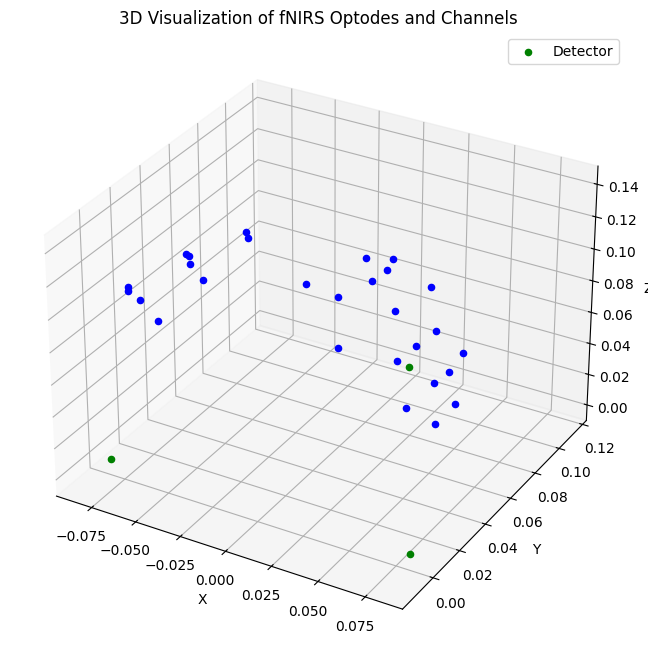

In [7]:
import mne
from mne.datasets.fnirs_motor import data_path
from mne.io import read_raw_nirx
import matplotlib.pyplot as plt

# Load the fNIRS dataset
fnirs_data_folder = data_path()
fnirs_cw_amplitude_dir = fnirs_data_folder / "Participant-1"

# Read the raw NIRx data
raw_intensity = read_raw_nirx(fnirs_cw_amplitude_dir, verbose=True)
raw_intensity.load_data()

# Extract the montage (optode positions)
montage = raw_intensity.info['dig']

# Create a 3D plot of the montage
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot optodes
for dig_point in montage:
    pos = dig_point['r']
    if dig_point['kind'] == mne.io.constants.FIFF.FIFFV_POINT_EEG:  # Channels
        ax.scatter(*pos, color='b', label='Channel' if dig_point is montage[0] else "")
    elif dig_point['kind'] == mne.io.constants.FIFF.FIFFV_POINT_HPI:  # HPI
        ax.scatter(*pos, color='r', label='Source' if dig_point is montage[0] else "")
    elif dig_point['kind'] == mne.io.constants.FIFF.FIFFV_POINT_CARDINAL:  # Cardinal
        ax.scatter(*pos, color='g', label='Detector' if dig_point is montage[0] else "")

# Set plot parameters
ax.set_title('3D Visualization of fNIRS Optodes and Channels')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()

plt.show()


In [8]:
subjects_dir = mne.datasets.sample.data_path() / "subjects"


Using default location ~/mne_data for sample...


100%|######################################| 1.65G/1.65G [00:00<00:00, 827GB/s]
Untarring contents of 'C:\Users\pavan\mne_data\MNE-sample-data-processed.tar.gz' to 'C:\Users\pavan\mne_data'


Download complete in 03m54s (1576.2 MB)


RuntimeError: Could not load any valid 3D backend
pyvistaqt: No module named 'qtpy'
notebook: No module named 'ipyevents'

 install pyvistaqt, using pip or conda:
'pip install pyvistaqt'
'conda install -c conda-forge pyvistaqt'

 or install ipywidgets, if using a notebook backend
'pip install ipywidgets'
'conda install -c conda-forge ipywidgets'

In [10]:
!pip install ipywidgets
!conda install -c conda-forge ipywidgets
brain = mne.viz.Brain(
    "fsaverage", subjects_dir=subjects_dir, background="w", cortex="0.5"
)
brain.add_sensors(
    raw_intensity.info,
    trans="fsaverage",
    fnirs=["channels", "pairs", "sources", "detectors"],
)
brain.show_view(azimuth=20, elevation=60, distance=400)

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/139.4 kB ? eta -:--:--
   ----------- --------------------------- 41.0/139.4 kB 326.8 kB/s eta 0:00:01
   ------------------------------------ - 133.1/139.4 kB 871.5 kB/s eta 0:00:01
   -------------------------------------- 139.4/139.4 kB 828.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/214.4 kB ? eta -:--:--
   ---------------------------------- ----- 184.3/214.4 kB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 214.4/214.4 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ------ --------------------------------- 0.4/2.3 MB 10.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.6/2.3 MB 9.6 MB/s eta 0:00:01
   -----------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
'conda' is not recognized as an internal or external command,
operable program or batch file.


RuntimeError: Could not load any valid 3D backend
pyvistaqt: No module named 'qtpy'
notebook: No module named 'ipyevents'

 install pyvistaqt, using pip or conda:
'pip install pyvistaqt'
'conda install -c conda-forge pyvistaqt'

 or install ipywidgets, if using a notebook backend
'pip install ipywidgets'
'conda install -c conda-forge ipywidgets'